# JK302 Visual Impact on Phoneme Perception in Noise with Natural Sentences

We are going to look at the pilot data and try to attack a few key questions with this notebook.

1. How much does lip reading improve phonemic perception of clear vs noisy speech?

2. Does this interaction change over the course of a sentence?

3. Do some phonemes benefit from speechreading more than others?

### Loading...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.DataFrame.from_csv('C:/Experiments/JK307/dataOut/bigP_r1.csv')

#Relabel babble condition for clarity
df.loc[df['VideoCond'] == 'AV',('VideoCond')] = 'Audiovisual'
df.loc[df['VideoCond'] == 'AO',('VideoCond')] = 'Auditory Only'


#Make WordIdx start from 1, not zero
df.WordIdx = df.WordIdx+1

Lessons learned from Jk301 Initial Notes

In [2]:
# Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
# Find where words match
matchIdx = df['SourceWord'] == df['TargetWord']
#Set the source phonemes to match the target
df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
#Reset the measure of phoneme accuracy
df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
#Set a measure all phonemes matching
df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
#Set a measure all phonemes missing
df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
# Make a column for the number of words in the sentence
df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)
#Position of the word in relation to the last word of the sentence
df['WordFromLast'] = df['NumWordsInSentence']-df['WordIdx']

dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
df = df[df['TargetPhoneme'].isin(dfPT['CMU Phonemes'])]

#df.rename(columns={'0':'PENNPOS'}, inplace=True)
#df.rename(columns={'0.1':'UPOS'}, inplace=True)
df.keys()

Index([u'level_0', u'Unnamed: 0.1', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       u'SoundCond', u'VideoCond', u'CounterBalBlock', u'TrialOrder',
       u'BabbleFile', u'Subject', u'SubjectTalkerNum', u'WordIdxList',
       u'SourceSentence', u'TargetSentence', u'FullSentence', u'dBSNR',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word_x', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'uns

In [3]:
df['Subject']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
30819    6
30820    6
30821    6
30822    6
30823    6
30824    6
30825    6
30826    6
30827    6
30828    6
30829    6
30830    6
30831    6
30832    6
30833    6
30834    6
30835    6
30836    6
30837    6
30838    6
30839    6
30840    6
30841    6
30842    6
30843    6
30844    6
30845    6
30846    6
30847    6
30848    6
Name: Subject, dtype: float64

In [4]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [5]:
df.keys()

Index([u'level_0', u'Unnamed: 0.1', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       u'SoundCond', u'VideoCond', u'CounterBalBlock', u'TrialOrder',
       u'BabbleFile', u'Subject', u'SubjectTalkerNum', u'WordIdxList',
       u'SourceSentence', u'TargetSentence', u'FullSentence', u'dBSNR',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word_x', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'uns

### How much does lip reading improve phonemic perception of clear vs noisy speech?

In [6]:
from __future__ import division
numSubs = 24
sqrtNmin1 = np.sqrt(numSubs-1)
data = df.loc[df['SoundCond'] =='Babble',:]
videoByBabbleAV = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Audiovisual',:].groupby(['UPOS','Subject']).mean()
videoByBabbleAO = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Auditory Only',:].groupby(['UPOS','Subject']).mean()
videoByBabbleDif = videoByBabbleAV-videoByBabbleAO

videoByBabble = videoByBabbleDif.reset_index().groupby(['UPOS']).mean()
videoByBabbleStd = videoByBabbleDif.reset_index().groupby(['UPOS']).std()/sqrtNmin1
videoByBabbleStd

,Subject,PhonemeHitBool
UPOS,,
ADJ,0.390095,0.019879
ADP,0.390095,0.025285
ADV,0.390095,0.020609
CONJ,0.390095,0.011924
DET,0.390095,0.009177
NOUN,0.390095,0.014530
NUM,0.390095,0.041992
PRON,0.390095,0.018563
PRT,0.390095,0.027003


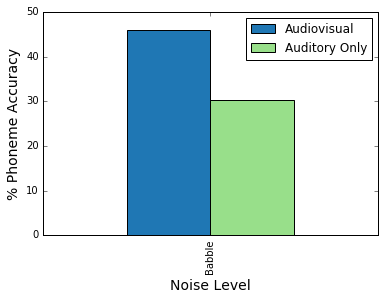

In [7]:
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].groupby(['SoundCond','VideoCond']).mean().apply(lambda x: x*100).unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('% Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

Do we replicate Sumby and Pollack (1954)?  That is to say, do we find that the ratio of AV improvement over AO is roughly constant?  Calculated as (AOerrors-AVerrors)/AOerrors

In [8]:
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert


PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble        -44.954189    -29.272465  -0.535716

Looks like in our case the amount phonemic improvement under noisy conditions is not only numerically higher, it's a much higher ratio of improvement. However, it could be that our listening "ceiling" is less than 100% in practice, due to loss in working memory, spelling errors or accent confusion. 

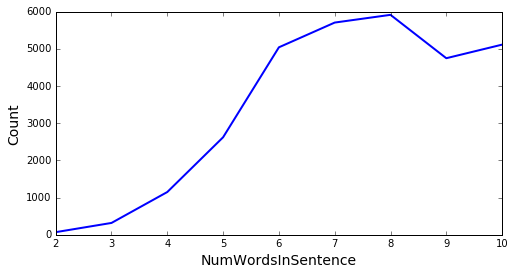

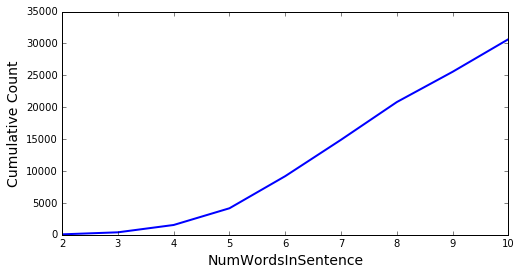

In [9]:
data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Count')

data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count().cumsum()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Cumulative Count')

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble          0.562072      0.715733   0.214691

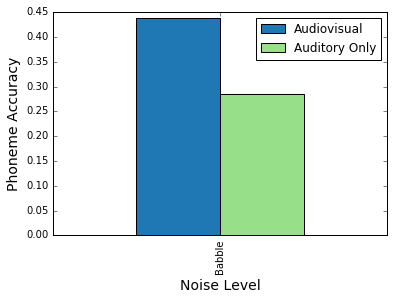

In [10]:
#Long sentence analysis
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].loc[df['NumWordsInSentence'] >= 8,:].groupby(['SoundCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

### Does the contribution of visual information to phonemic perception change over the course of a sentence?

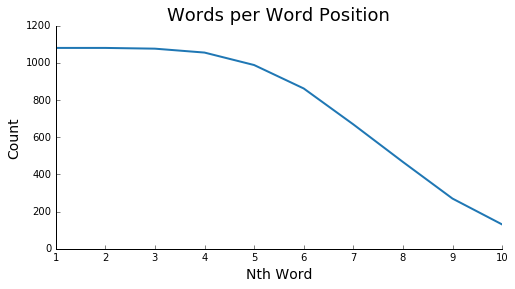

In [11]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').count()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Words per Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Count')
hide_spines()


At higher word positions, we have fewer instances to draw from. We'll limit or view to word positions 8 or fewer to have enough instances per condition to draw conclusions.

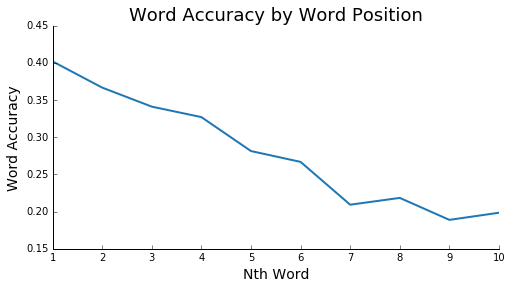

In [12]:
#Instances by word position in sentence
data = df[['WordACC','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Word Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Word Accuracy')
hide_spines()

We have a lovely linearish negative relationship between phoneme accuracy and word position. Wow! >20% drop between the first and 8th word. Same result for phoneme accuracy?

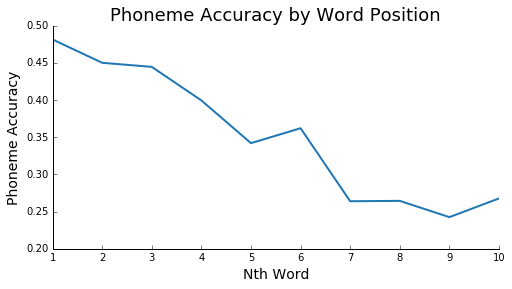

In [13]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx']].groupby('WordIdx').mean()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

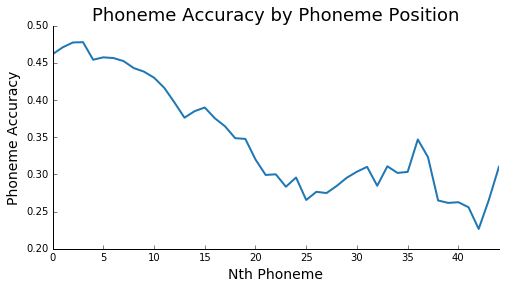

In [14]:
#Instances by phoneme position in sentence
data = df[['PhonemeHitBool','PhonemeIndex']].groupby('PhonemeIndex').mean()[0:45]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Phoneme Position')
ax.set_xlabel('Nth Phoneme')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

Yup! Phoneme accuracy will be a bit higher overall to account for partially correct responses. Trend is the same though. Lets make this more interesting by splitting it up by condition.

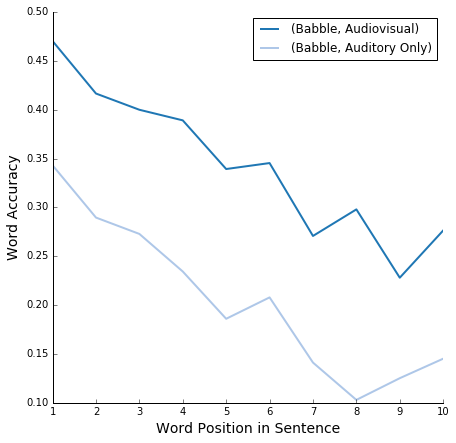

In [15]:
#data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond','WordCount']).mean()
#data = data.loc[data['Subject'] <13,:]
#data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
data = df.groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position in Sentence')
hide_spines()

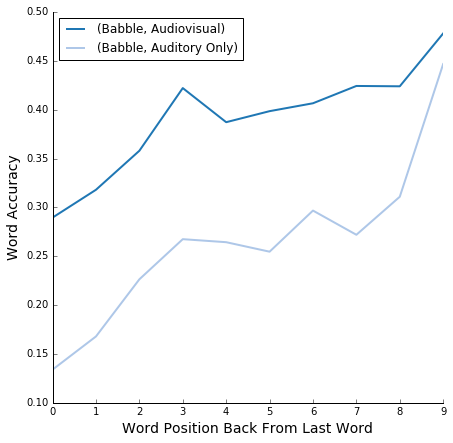

In [16]:
#data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond','WordCount']).mean()
#data = data.loc[data['Subject'] <13,:]
#data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
data = df.groupby(['WordFromLast','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position Back From Last Word')
hide_spines()

In [17]:
#First Three Last Three Not
first3 = df[df['WordIdx'] <= 3]
last3 = df[df['WordFromLast'] <= 2]
dataFirst = first3.groupby(['SoundCond','VideoCond']).mean()['WordACC'].reset_index()
dataFirst['WordPos'] = 'First3'
dataLast = last3.groupby(['SoundCond','VideoCond']).mean()['WordACC'].reset_index()
dataLast['WordPos'] = 'Last3'
dataFirst

,SoundCond,VideoCond,WordACC,WordPos
0,Babble,Audiovisual,0.426911,First3
1,Babble,Auditory Only,0.299414,First3


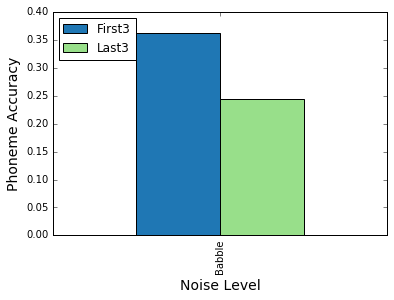

In [18]:
merged = pd.concat([dataFirst,dataLast])
merged = merged.reset_index()
merged
merged = merged.groupby(['SoundCond','WordPos']).mean().unstack()['WordACC']
merged
ax = merged.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='upper left',labels = ['First3','Last3'])
plt.figure()

In [21]:
data = df[['WordACC','WordIdx','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond']).mean()
data

,,WordACC,WordIdx,Subject
VideoCond,SoundCond,,,
Audiovisual,Babble,0.368438,4.395951,3.495231
Auditory Only,Babble,0.228190,4.448716,3.518601


In [23]:
data = df.groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
ax = sumbyRatio.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1]])
ax.legend(loc='best')
ax.set_ylabel('SumbyRatio')
ax.set_xlabel('Word Position in Sentence')
hide_spines()


Error in callback <function post_execute at 0x080DFD30> (for post_execute):


ValueError: to_rgba: Invalid rgba arg "[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)]"
length of rgba sequence should be either 3 or 4

ValueError: to_rgba: Invalid rgba arg "[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)]"
length of rgba sequence should be either 3 or 4

### Do some phonemes benefit from speechreading more than others?

,PhonemeHitBool
TargetPhoneme,
ZH,1.3125
OY,4.1875
TH,9.1875
CH,10.1875
UH,10.1875
JH,11.8750
AW,13.2500
NG,18.2500
Y,19.3125


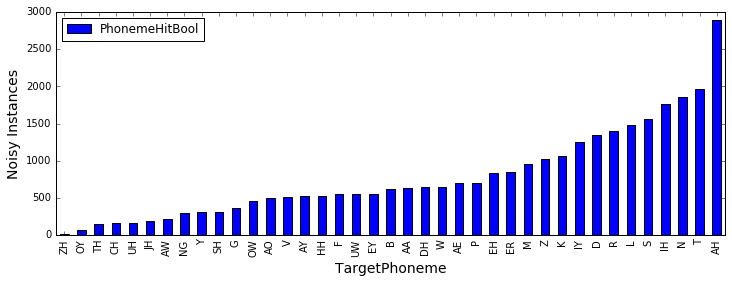

In [24]:
data = df.loc[df['SoundCond'] =='Babble',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
data = data[['TargetPhoneme','PhonemeHitBool']].groupby(['TargetPhoneme']).count()
instances = data
data = data.sort_values('PhonemeHitBool')
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Instances')
data/float(90)/float(24)*135


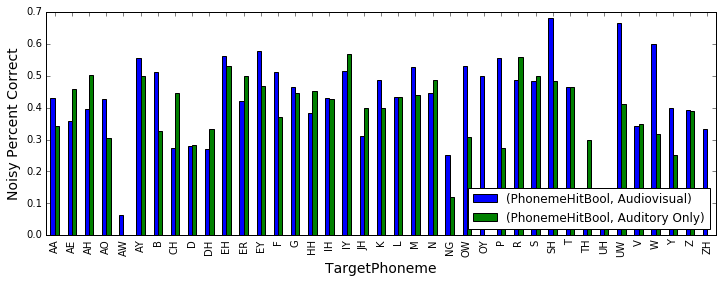

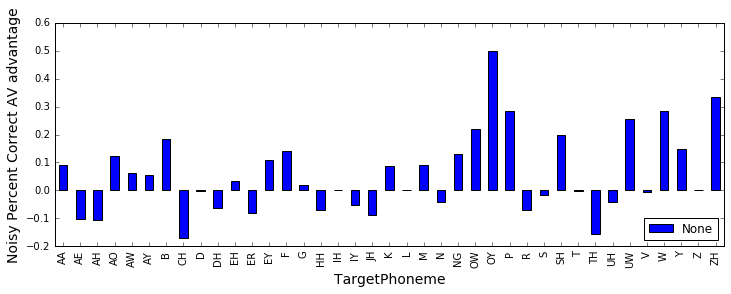

In [25]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
a= data['AllPhonsMatch'] == False 
b = data['AllPhonsMiss'] == False
boolIdx =a&b 
data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHit = data['PhonemeHitBool','Audiovisual']
aoNoisyPHit = data['PhonemeHitBool','Auditory Only']
plt.figure()
dif = avNoisyPHit-aoNoisyPHit
ax = dif.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct AV advantage')

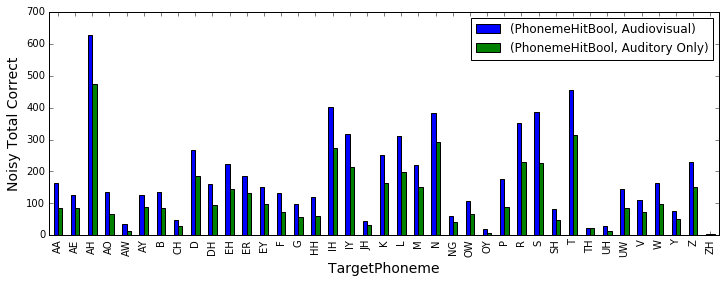

In [26]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).sum()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Total Correct')
avNoisyPHitSum = data['PhonemeHitBool','Audiovisual']
aoNoisyPHitSum = data['PhonemeHitBool','Auditory Only']


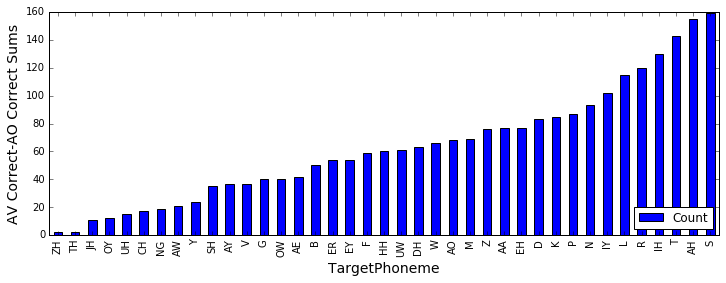

In [27]:
avGain = avNoisyPHitSum-aoNoisyPHitSum
avGainRank = avGain.rank(ascending = False)
avGain.name = 'Count'
data = avGain.sort_values()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('AV Correct-AO Correct Sums')

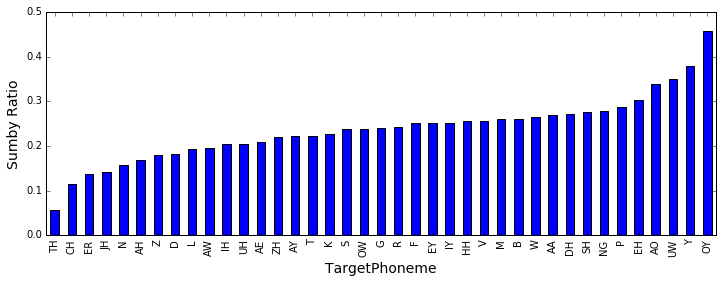

In [28]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
data = data.join(sumbyRatio)
#instances.name = 'Count'
#data = data.join(instances)
data.columns = ['AV','AO','SumbyRatio']
data = data.sort_values('SumbyRatio')
ax =data['SumbyRatio'].plot(kind ='bar',figsize=(12,4),legend = None)
ax.set_ylabel('Sumby Ratio')

Yay! AV weights for all noisy phonemes!

In [29]:
import os
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
sumbyRank = sumbyRatio.rank()
aoNoisyRank = aoNoisyPHit.rank()
avNoisyRank = avNoisyPHit.rank()
rankDif = avNoisyRank-aoNoisyRank
rankDifNorm = (rankDif-min(rankDif))/max(rankDif-min(rankDif))
rankDifNorm

TargetPhoneme
AA    0.536082
AE    0.103093
AH    0.000000
AO    0.597938
AW    0.432990
AY    0.443299
B     0.773196
CH    0.051546
D     0.432990
DH    0.268041
EH    0.412371
ER    0.082474
EY    0.577320
F     0.690722
G     0.391753
HH    0.144330
IH    0.371134
IY    0.268041
JH    0.216495
K     0.567010
L     0.391753
M     0.597938
N     0.226804
NG    0.453608
OW    0.886598
OY    0.969072
P     1.000000
R     0.206186
S     0.247423
SH    0.618557
T     0.319588
TH    0.329897
UH    0.391753
UW    0.804124
V     0.329897
W     0.969072
Y     0.639175
Z     0.350515
ZH    0.597938
dtype: float64

Let's visualize the advantage of having visual information at the phonetic level a better way, with the help of an interactive phonetic chart! Lots of code below so be patient!

In [30]:
global cmaps
def BokehTable(cmaps):
    from bokeh.models import HoverTool, ColumnDataSource,CustomJS
    from bokeh.plotting import figure, show, output_file
    import pandas as pd
    import os
    import math
    from bokeh.io import output_notebook,vform,push_notebook
    global source
    

    cmap = cmaps[0]        
    output_notebook()
    #dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.csv'))
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
    #cmap = [aoNoisyRank.loc[aoNoisyRank.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoNoisyRank.values)
    #cmap = [rankDifNorm.loc[rankDifNorm.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(rankDifNorm.values)
        
    source = ColumnDataSource(
        data=dict(
            xaxis=[str(x) for x in dfPT['AdrianXCoord']],
            yaxis=[str(y) for y in dfPT['AdrianYCoord']],
            cmu=[str(s) for s in dfPT['CMU Phonemes']],
            type=[str(x) for x in cmap],
            sym=[x for x in dfPT['IPA symbol']],
            jrank=[x for x in dfPT['Jeffers Visibility Rank']],
            mpcrank=[x for x in dfPT['MPC Rank']], 
            gvrank=[x for x in dfPT['Gillen Based Visual Weight'].rank(ascending=False)],
            gaorank=[x for x in dfPT['Gillen Audio Only Clear Hit Rate'].rank(ascending=False)],
            example=[x for x in dfPT['CMU Examples']],   
            type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
        )
    )

    p = figure(tools="resize,hover,save")
    p.plot_width = 1200
    p.toolbar_location = None
    p.outline_line_color = None

    p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
           fill_alpha=0.6, color="type_color")

    #p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
    #       fill_alpha=0.6)

    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle"
    }

    p.text(x="xaxis", y="yaxis", text="sym",
           text_font_style="bold", text_font_size="15pt", **text_props)



    p.grid.grid_line_color = None

    p.select_one(HoverTool).tooltips = [
        ("cmu", "@cmu"),
        ("example", "@example"),
        ("jrank","@jrank"),
        ("mpcrank","@mpcrank"),
        ("gaorank","@gaorank"),
        ("gvrank","@gvrank"),

    ]
    show(p) 
    
def update(f):
    import math
    from bokeh.io import push_notebook
    cmap = cmaps[titles.index(f)] 
    type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap]
    source.data['type_color'] = type_color
    push_notebook() 

In [31]:
data = df.loc[df['SoundCond'] =='Babble',:]
#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ao = data.xs('Auditory Only',level = 1,axis=1)
av = data.xs('Audiovisual',level = 1,axis=1)

#Lousy Hack!!!!!!!!!!
ao.loc[('ZH'),('PhonemeHitBool')] = 0
av.loc[('ZH'),('PhonemeHitBool')] = 0

aoRank = ao.rank(ascending = False)
avRank = av.rank(ascending = False)



sumbyRatio = ((1-ao)-(1-av))/(1-ao)
sumbyRank = sumbyRatio.rank(ascending = False)
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')

cmaps =[]
titles =[]

Jeffers = dfPT['Jeffers Visibility Rank']
titles.append('Jeffers Visibility Map')
cmaps.append(Jeffers/max(Jeffers))

MPC = dfPT['MPC Rank']
titles.append('Movement-to-Phonetic Correspondance Map')
cmaps.append(MPC/max(MPC))

titles.append('Sumby Noisy Visibility Map')
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))

titles.append('Auditory Only Noisy Rank Map')
cmaps.append([aoRank.loc[aoRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoRank.values)) 

titles.append('Audiovisual Noisy Rank Map')
cmaps.append([avRank.loc[avRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(avRank.values)) 

titles.append('AV Gain Raw Rank')
cmaps.append([avGainRank[avGainRank.index == cmu].values for cmu in dfPT['CMU Phonemes'][0:39]]/max(avGainRank.values)) 

#pd.concat([Jeffers,dfPT['CMU Phonemes'][0:39]],axis=1).set_index('CMU Phonemes')

C:\Anaconda2_32bit\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
sumbyRank

,PhonemeHitBool
TargetPhoneme,
AA,10
AE,26
AH,33
AO,4
AW,29
AY,25
B,12
CH,37
D,31


In [33]:
global cmaps
def BokehTable(cmaps):
    from bokeh.models import HoverTool, ColumnDataSource,CustomJS
    from bokeh.plotting import figure, show, output_file
    import pandas as pd
    import os
    import math
    from bokeh.io import output_notebook,vform,push_notebook
    global source
    

    cmap = cmaps[0]        
    output_notebook()
    #dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.csv'))
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r4.xlsx'),encoding='latin-1')
    #cmap = [aoNoisyRank.loc[aoNoisyRank.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoNoisyRank.values)
    #cmap = [rankDifNorm.loc[rankDifNorm.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(rankDifNorm.values)
        
    source = ColumnDataSource(
        data=dict(
            xaxis=[str(x) for x in dfPT['ConsXCoord']],
            yaxis=[str(y) for y in dfPT['ConsYCoord']],
            cmu=[str(s) for s in dfPT['CMU Phonemes']],
            type=[str(x) for x in cmap],
            sym=[x for x in dfPT['IPA symbol']],
            jrank=[x for x in dfPT['Jeffers Visibility Rank']],
            mpcrank=[x for x in dfPT['MPC Rank']], 
            gvrank=[x for x in dfPT['Gillen Based Visual Weight'].rank(ascending=False)],
            gaorank=[x for x in dfPT['Gillen Audio Only Clear Hit Rate'].rank(ascending=False)],
            example=[x for x in dfPT['CMU Examples']],   
            type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
        )
    )

    p = figure(tools="resize,hover,save")
    p.plot_width = 1200
    p.toolbar_location = None
    p.outline_line_color = None

    p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
           fill_alpha=0.6, color="type_color")
    


    #p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
    #       fill_alpha=0.6)

    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle"
    }

    p.text(x="xaxis", y="yaxis", text="sym",
           text_font_style="bold", text_font_size="15pt", **text_props)



    p.grid.grid_line_color = None

    p.select_one(HoverTool).tooltips = [
        ("cmu", "@cmu"),
        ("example", "@example"),
        ("jrank","@jrank"),
        ("mpcrank","@mpcrank"),
        ("gaorank","@gaorank"),
        ("gvrank","@gvrank"),

    ]
    show(p) 
    
def update(f):
    import math
    from bokeh.io import push_notebook
    cmap = cmaps[titles.index(f)] 
    type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap]
    source.data['type_color'] = type_color
    push_notebook() 

Here it is! Use the drop down menu below to select the coloring scheme for the phonetic chart.

In [34]:
from IPython.html.widgets import interact
interact(updateCons,f=titles)

C:\Anaconda2_32bit\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


NameError: name 'updateCons' is not defined

In [35]:
   BokehTable(cmaps)   

Loading BokehJS ...

We can also look at the map for the clear data

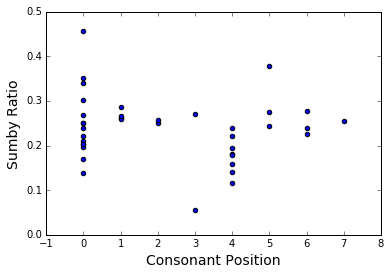

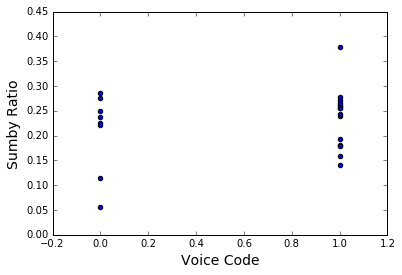

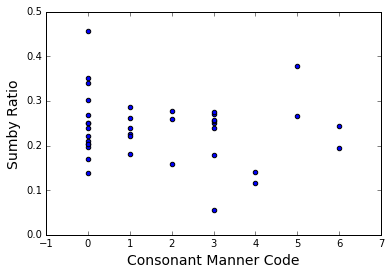

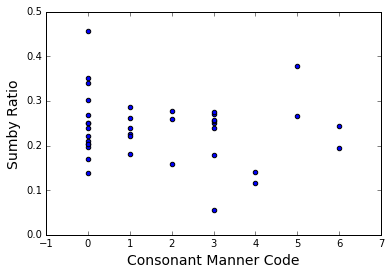

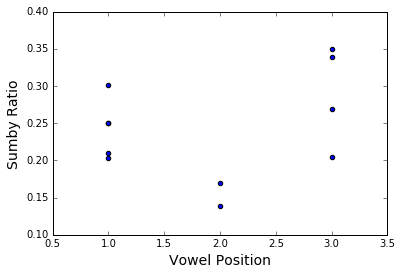

In [36]:
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r4.xlsx'),encoding='latin-1')
dfPT = dfPT[0:38]
dfPT['Sumby Rank'] = ([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:38]]/max(sumbyRank.values)) 
dfPT['Sumby Ratio'] = ([sumbyRatio.loc[sumbyRatio.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:38]])

data = dfPT[['Consonant Place','Sumby Ratio','CMU Phonemes']].groupby(['Consonant Place','CMU Phonemes']).mean()
dfPT['Consonant Voice']
#data.plot(kind = 'bar')
#dfPT['Consonant Place']
dfPT.plot.scatter(x='Consonant Position', y='Sumby Ratio')
dfPT.plot.scatter(x='Voice Code', y='Sumby Ratio')
dfPT.plot.scatter(x='Consonant Manner Code', y='Sumby Ratio')
dfPT.plot.scatter(x='Consonant Manner Code', y='Sumby Ratio')
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r4.xlsx'),encoding='latin-1')
dfPT = dfPT[dfPT['Phon Type (American IPA)'] == 'Monophthong']
dfPT['Sumby Ratio'] = ([sumbyRatio.loc[sumbyRatio.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:38]])
dfPT.plot.scatter(x='Vowel Position', y='Sumby Ratio')

In [37]:
data = df.loc[df['SoundCond'] =='Clear',:]


data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
sumbyRank = sumbyRatio.rank(ascending = False)
cmaps = []
titles = []
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))
titles.append('Sumby Clear Visibility Map')
BokehTable(cmaps)

KeyError: 'Audiovisual'

### Did participants have similar performance?

In [38]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Clear'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

TypeError: Empty 'DataFrame': no numeric data to plot

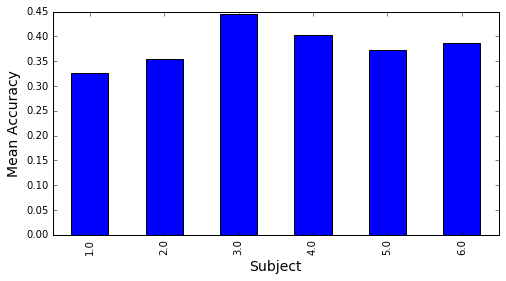

In [39]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

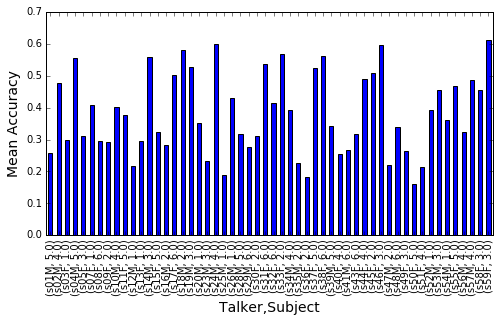

In [40]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby(['Talker','Subject']).mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

### Did participants improve over the course of of each block as they got used to the speaker?

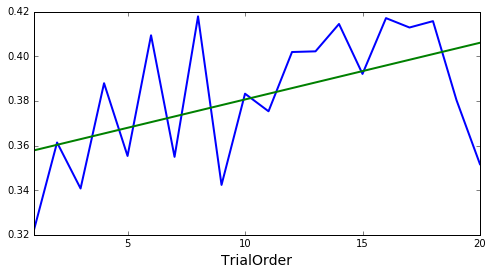

In [41]:
data = df[['PhonemeHitBool','TrialOrder']][df['SoundCond'] == 'Babble'].groupby('TrialOrder').mean()
data.plot(kind = 'line',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

#From Dan Allen
import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse
x = data.index
y = data.values
m, b = fit_line2(x,y)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x.min(), x.max(), N)
plt.plot(points, m*points + b)


### Do different parts of speech have different AV profiles?

In [42]:
df['PENNPOS'][0:9]

0    DT
1    DT
2    NN
3    NN
4    NN
5    NN
6    NN
7    NN
8    NN
Name: PENNPOS, dtype: object

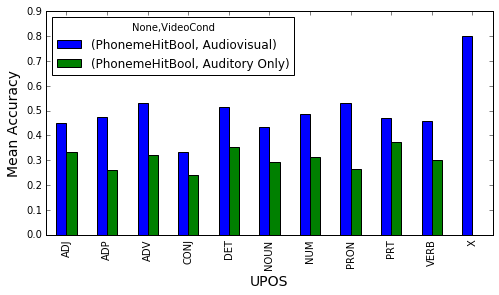

In [43]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','UPOS']][df['SoundCond'] == 'Babble'].groupby(['UPOS','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

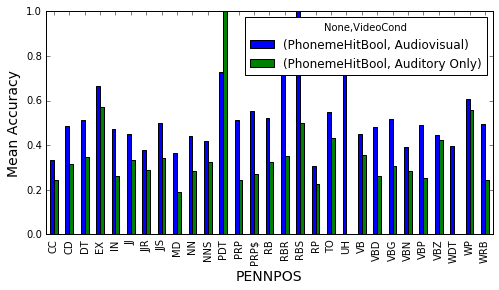

In [44]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','PENNPOS']][df['SoundCond'] == 'Babble'].groupby(['PENNPOS','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

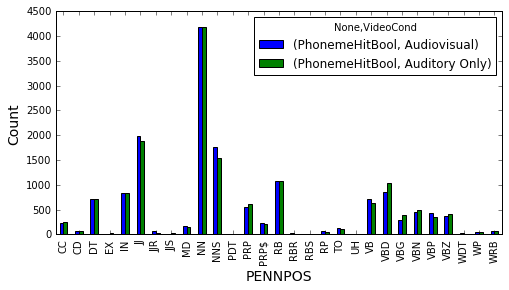

In [45]:
#Counts
ax = df[['PhonemeHitBool','VideoCond','PENNPOS']][df['SoundCond'] == 'Babble'].groupby(['PENNPOS','VideoCond']).count().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')

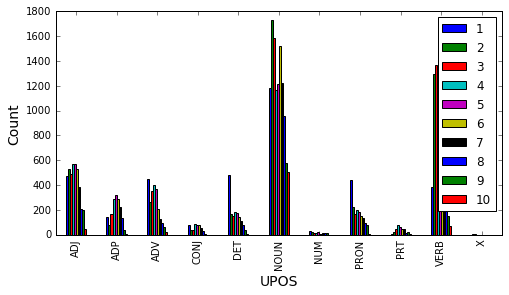

In [46]:
#COunts
ax = df[['WordIdx','UPOS']][df['SoundCond'] == 'Babble'].groupby(['UPOS','WordIdx']).size().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')
ax.legend(loc= 'best')

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
PENNPOS                                          
DT              0.485477      0.653315   0.256902
IN              0.527076      0.738717   0.286499
JJ              0.548338      0.664358   0.174634
NN              0.559245      0.716878   0.219888
NNS             0.579306      0.676623   0.143827
PRP             0.488073      0.756137   0.354518
RB              0.477528      0.675926   0.293520
VB              0.548117      0.645367   0.150690
VBD             0.516802      0.737198   0.298965
VBN             0.606522      0.716904   0.153971
VBP             0.509390      0.745152   0.316395
VBZ             0.554960      0.577017   0.038226

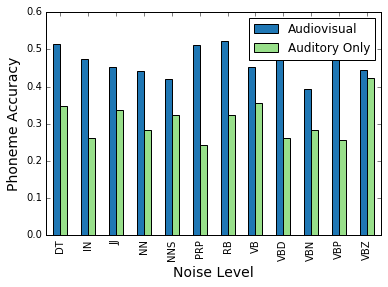

In [47]:
#Long sentence analysis
videoByBabble = df[['PENNPOS','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['PENNPOS','VideoCond']).mean().unstack()
videoByBabbleCount = df[['PENNPOS','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['PENNPOS','VideoCond']).size().unstack()
#Restrict to words with more than 300 instances in each group
booldf =(videoByBabbleCount > 300)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
UPOS                                             
ADJ             0.550654      0.665126   0.172105
ADP             0.527076      0.738717   0.286499
ADV             0.467401      0.677778   0.310393
CONJ            0.666667      0.757812   0.120275
DET             0.485825      0.646904   0.249000
NOUN            0.565181      0.706057   0.199525
PRON            0.470944      0.733179   0.357668
VERB            0.542511      0.697782   0.222520

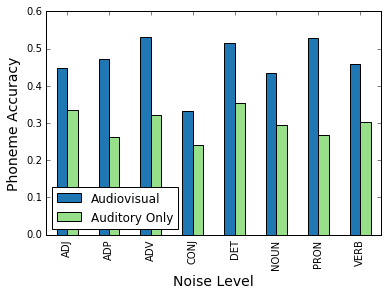

In [48]:
data=df
videoByBabble = data[['UPOS','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['UPOS','VideoCond']).mean().unstack()
videoByBabbleCount = data[['UPOS','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['UPOS','VideoCond']).size().unstack()
#Restrict to words with more than 200 instances in each group
booldf =(videoByBabbleCount > 200)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
UPOS                                             
ADJ             0.495690      0.604082   0.179433
ADV             0.307339      0.581498   0.471469
DET             0.388000      0.564655   0.312855
NOUN            0.437795      0.587273   0.254528
PRON            0.402778      0.656250   0.386243
VERB            0.579208      0.644809   0.101737

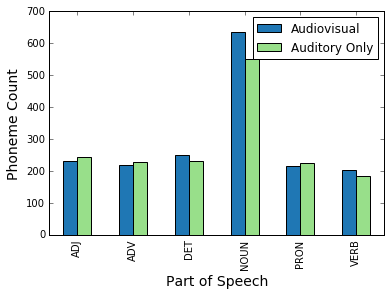

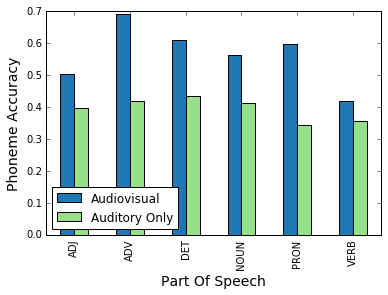

In [49]:
#Restrict to a particular word position
data = df.loc[df['WordIdx'] == 1,:]
#data=df
videoByBabble = data[['UPOS','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['UPOS','VideoCond']).mean().unstack()
videoByBabbleCount = data[['UPOS','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['UPOS','VideoCond']).size().unstack()
#Restrict to words with more than 100 instances in each group
booldf =(videoByBabbleCount > 100)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('Part of Speech')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Part Of Speech')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert



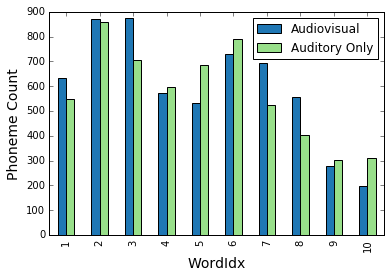

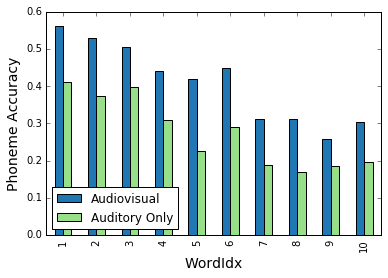

In [50]:
#Restrict to a particular word position
data = df.loc[df['UPOS'] == 'NOUN',:]
#data=df
videoByBabble = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).mean().unstack()
videoByBabbleCount = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).size().unstack()
#Restrict to words with more than 50 instances in each group
booldf =(videoByBabbleCount > 50)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('WordIdx')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('WordIdx')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
#videoByBabbleInvert

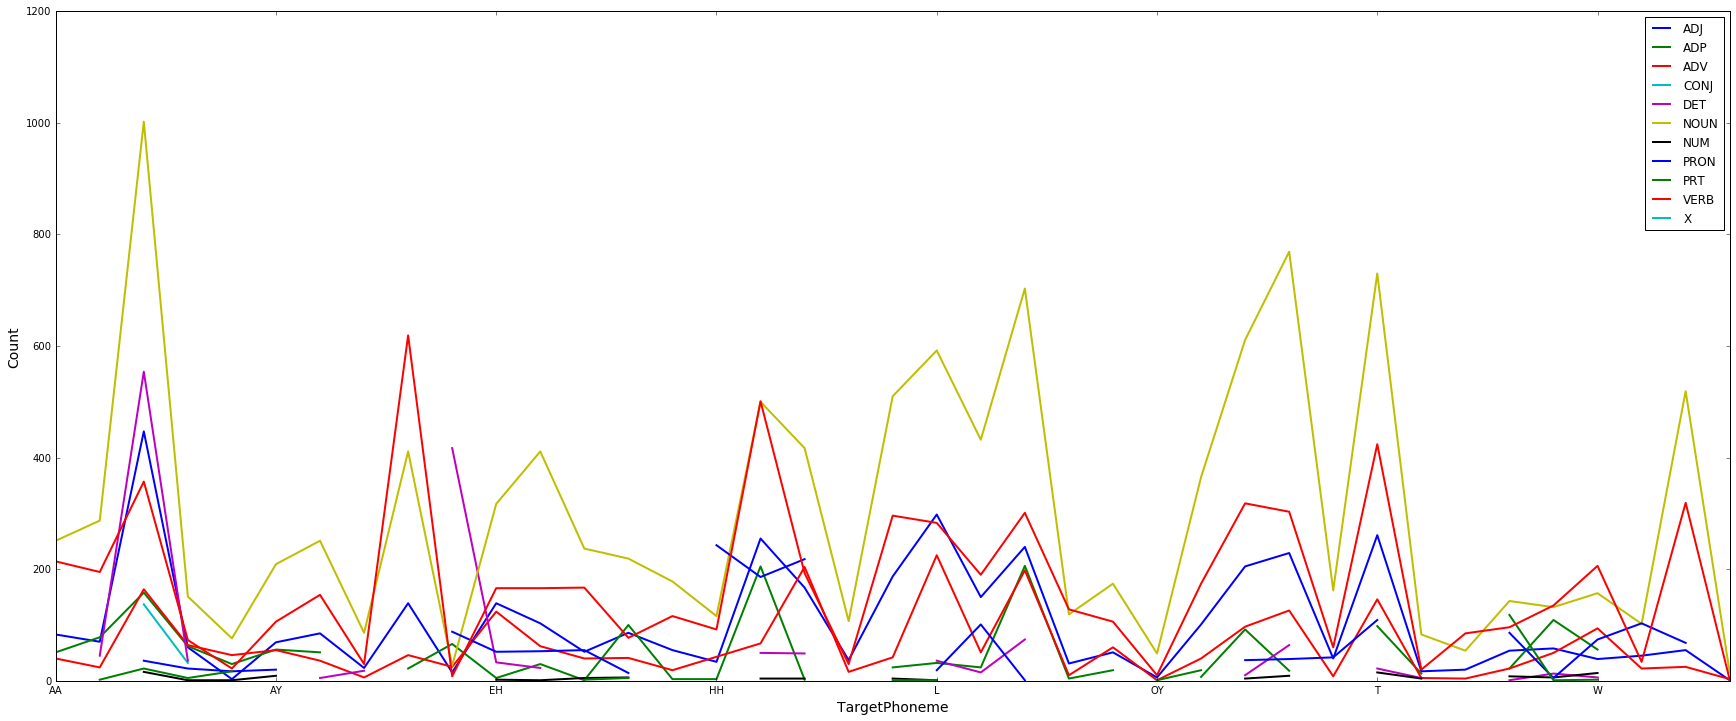

In [51]:
#COunts
ax = df[['TargetPhoneme','UPOS']][df['SoundCond'] == 'Babble'].groupby(['TargetPhoneme','UPOS']).size().unstack().plot(kind = 'line',figsize=(30,12))
ax.set_ylabel('Count')
ax.legend(loc= 'best')

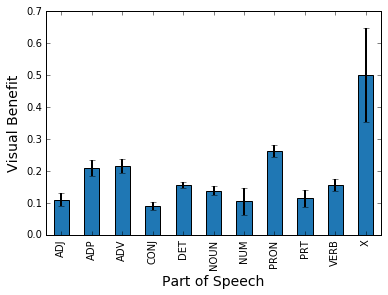

In [52]:
from __future__ import division
numSubs = 24
sqrtNmin1 = np.sqrt(numSubs-1)
data = df.loc[df['SoundCond'] =='Babble',:]
videoByBabbleAV = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Audiovisual',:].groupby(['UPOS','Subject']).mean()
videoByBabbleAO = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Auditory Only',:].groupby(['UPOS','Subject']).mean()
videoByBabbleDif = videoByBabbleAV-videoByBabbleAO

videoByBabble = videoByBabbleDif.reset_index().groupby(['UPOS']).mean()
videoByBabbleStd = videoByBabbleDif.reset_index().groupby(['UPOS']).std()/sqrtNmin1
videoByBabbleStd



ax = videoByBabble['PhonemeHitBool'].plot(kind ='bar',yerr = videoByBabbleStd['PhonemeHitBool'],figsize = (6,4), color = [tableau20[x] for x in [0,0]])
ax.set_ylabel('Visual Benefit')
ax.set_xlabel('Part of Speech')
plt.figure()

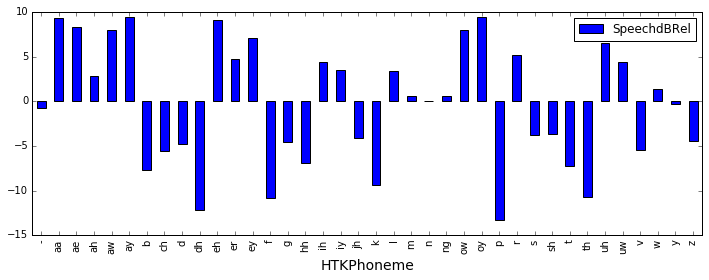

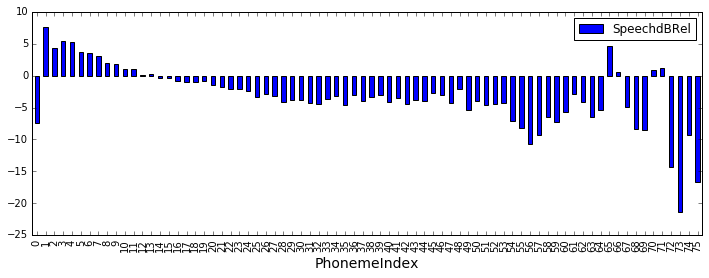

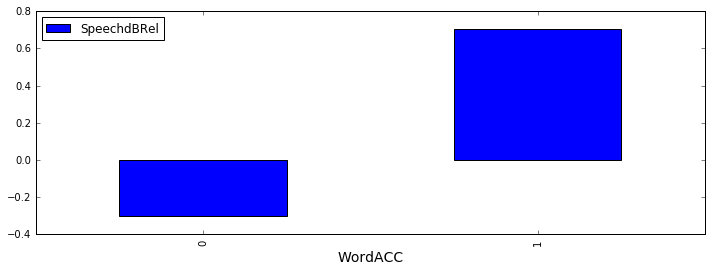

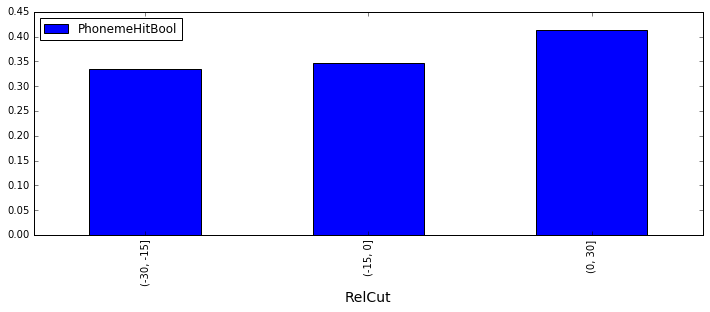

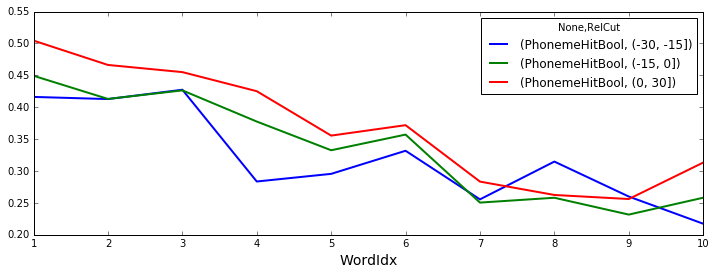

In [53]:
import math
def amp2db(scalar):
    return 20 * math.log10(scalar)

df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
df[['HTKPhoneme','SpeechdBRel']].groupby('HTKPhoneme').mean().plot(kind='bar',figsize=(12,4))
df[['PhonemeIndex','SpeechdBRel']].groupby('PhonemeIndex').mean().plot(kind='bar',figsize=(12,4))
df[['WordACC','SpeechdBRel']].groupby('WordACC').mean().plot(kind='bar',figsize=(12,4))
isNoisy = df['SoundCond'] == 'Babble'
dfN = df[isNoisy]
dfN['RelCut'] = pd.cut(dfN['SpeechdBRel'],[-30, -15,  0, 30])
dfN[['PhonemeHitBool','RelCut',]].groupby('RelCut').mean().plot(kind='bar',figsize=(12,4))

dfN[['PhonemeHitBool','WordIdx','RelCut']].groupby(['WordIdx','RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))


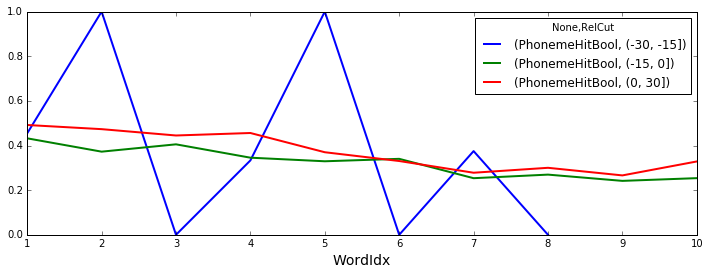

In [54]:
wordAvgN = dfN[['SpeechdBRel','PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean()
wordAvgN['RelCut'] = pd.cut(wordAvgN['SpeechdBRel'],[-30, -15,  0, 30])
wordAvgN[['PhonemeHitBool','WordIdx','RelCut']].groupby(['WordIdx','RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))

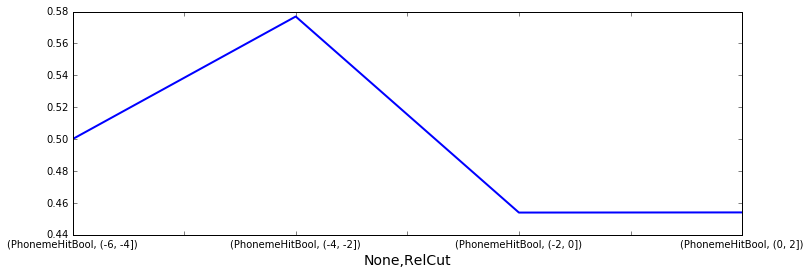

In [55]:
FirstWordAvgN = dfN[dfN['WordIdx'] <= 3]
FirstWordAvgN['SpeechdBRel']
FirstWordAvgN = FirstWordAvgN[['SpeechdBRel','PhonemeHitBool','SentenceCount']].groupby('SentenceCount').mean().round()
#FirstWordAvgN['RelCut'] = pd.cut(FirstWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])
FirstWordAvgN['RelCut'] = pd.cut(FirstWordAvgN['SpeechdBRel'],[-6,-4,-2,0,2])
FirstWordAvgN[['PhonemeHitBool','RelCut']].groupby(['RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))

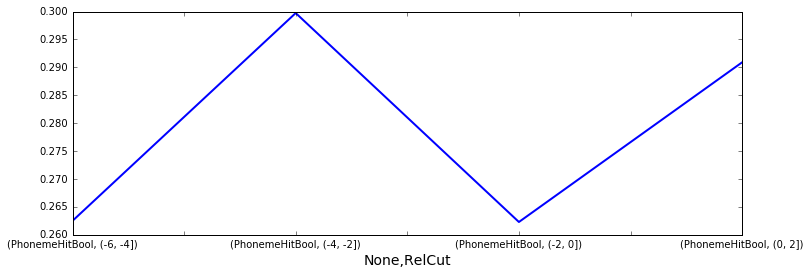

In [56]:
LastWordAvgN = dfN[dfN['WordFromLast'] <= 2]
LastWordAvgN['SpeechdBRel']
LastWordAvgN = LastWordAvgN[['SpeechdBRel','PhonemeHitBool','SentenceCount']].groupby('SentenceCount').mean().round()
LastWordAvgN
#LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])
LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-6,-4,-2,0,2])
LastWordAvgN[['PhonemeHitBool','RelCut']].groupby(['RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))


C:\Anaconda2_32bit\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))
C:\Anaconda2_32bit\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


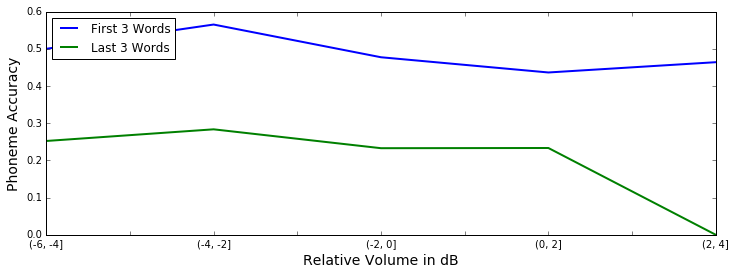

In [57]:
df['IsFirstThree'] = df['WordIdx'] <= 3 
df['IsLastThree'] = df['WordFromLast'] <= 2 
FirstOrLast = df['IsFirstThree'] + df['IsLastThree']
SixOrMore = df['NumWordsInSentence'] >=6

dfX = df[FirstOrLast*SixOrMore]
isNoisy = dfX['SoundCond'] == 'Babble'
dfNx = dfX[isNoisy]
#FirstOrLast[df['NumWordsInSentence'] >=6]


dfNx = dfNx[['SpeechdBRel','PhonemeHitBool','SentenceCount','IsLastThree']].groupby(['SentenceCount','IsLastThree']).mean().round().reset_index()
dfNx
#FirstOrLast
#FirstOrLast*SixOrMore
#LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])

dfNx['RelCut'] = pd.cut(dfNx['SpeechdBRel'],[-6,-4,-2,0,2,4])
ax = dfNx[['PhonemeHitBool','RelCut','IsLastThree']].groupby(['RelCut','IsLastThree']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='upper left',labels = ['First 3 Words','Last 3 Words'])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Relative Volume in dB')

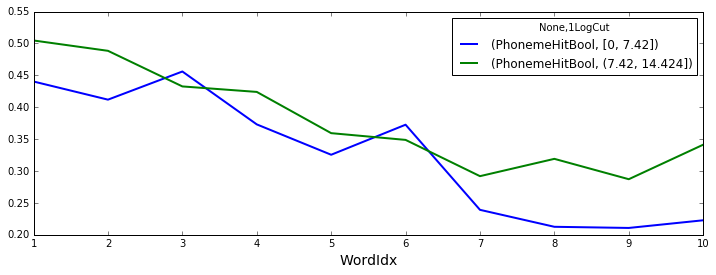

In [58]:
dfN['1LogCut'] = pd.qcut(dfN['1LogGram'],2)
dfN[['PhonemeHitBool','WordIdx','1LogCut']].groupby(['WordIdx','1LogCut']).mean().unstack().plot(kind='line',figsize=(12,4))

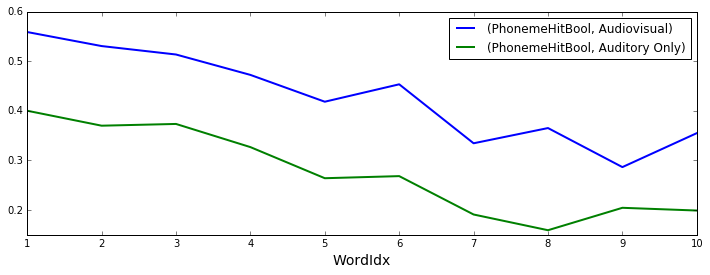

In [59]:
ax = dfN[['PhonemeHitBool','WordIdx','VideoCond']].groupby(['WordIdx','VideoCond']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='best')

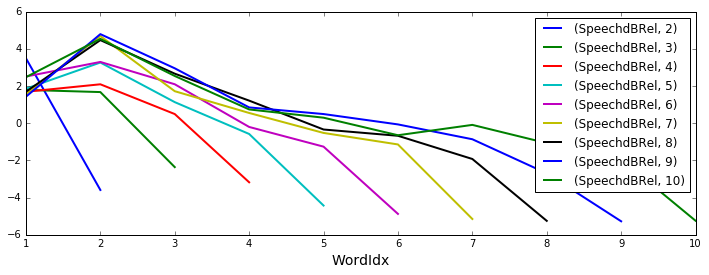

In [60]:
ax = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='upper right')

In [61]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) and yerr == 0:
        ymin = 0
        ymax = 0
    elif np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [76]:
numSubs = 24
grouped= dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence','Subject'])
subMean = grouped.mean().reset_index()
subMean
subG =subMean[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence'])
means = subG.mean()['PhonemeHitBool'].unstack()*100
errors = (subG.std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1)))*100
#means.columns = {'2','3','4','5','6','7','8','9','10'}
#errors.columns = {'2','3','4','5','6','7','8','9','10'}

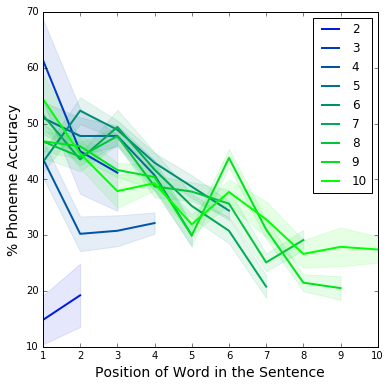

In [78]:
fig, ax = plt.subplots(figsize = (6,6))
for x in means.keys():
    errorfill(means.index,means[x],errors[x],color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
ax.legend(loc='upper right')
plt.ylabel('% Phoneme Accuracy')
plt.xlabel('Position of Word in the Sentence')



In [72]:
means = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack()
means.columns = means.columns.droplevel()
means.keys()

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name=u'NumWordsInSentence')

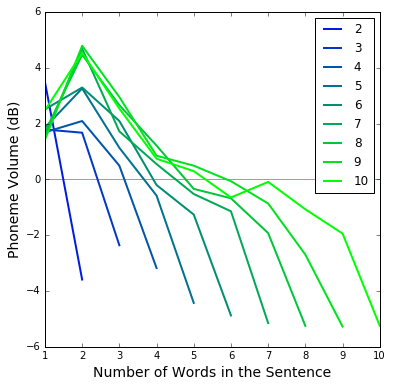

In [73]:
fig, ax = plt.subplots(figsize = (6,6))
means = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack()
means.columns = means.columns.droplevel()
errors = 0          
for x in means.keys():
    errorfill(means.index,means[x],errors,color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
ax.legend(loc='upper right')
plt.ylabel('Phoneme Volume (dB)')
plt.xlabel('Number of Words in the Sentence')

In [ ]:
df.keys()

In [ ]:
ax = dfN[['PhonemeHitBool','HTKPhoneme']].groupby(['HTKPhoneme']).mean().unstack().plot(kind='bar',figsize=(12,4))


In [ ]:
ax = dfN[['PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme']).mean().unstack().plot(kind='bar',figsize=(12,4))

In [ ]:
ax = dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','VideoCond']].groupby(['VideoCond','WordIdx','NumWordsInSentence',]).mean().unstack().plot(kind='bar',figsize=(12,4))
ax.legend(loc='lower left',labels ='')

In [ ]:
dfN['SpeechdBRel']